### Image Features
#### Ref
- [OpenCV Image Features](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning)
- [Features](http://aishack.in/tutorials/features/)
#### Notes
- Image feature points or pattern are something which can be easily tracked and compared across images. 
- Matched features/pattern across images can be aligned for usage in applications like Image stitching, 3D reconstruction, etc.
- Broadly feature is small neighbourhood region of image which can be localized and tracked uniquely
- Thus, corner-region is better feature compared to edge-region which is better compared to the flat-region in the image. In short, *Corners are good features to track*
- *Feature detection* - Process to find 'good' features *(unique ones for which corresponding points can be detrmined in other images)* or specifically, the corner features. For example, point where we get maximum change when moved in any direction.
- *Feature description* - Quantitative description of region/neighbourhood around the feature point.
- We can determine **features** and their **desciptors** in images to **match/align** them and stepping sone for *stitching, registration, motion tracking, mosaicing, streo-vsion, SFM, 3D modelling and reconstruction/Triangulation to determine 3D point from 2D image-point, image retrieval etc*.
    

### Harris Corner detection
#### Ref
- [OpenCV Harris Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)
- [Wikipedia](https://en.wikipedia.org/wiki/Harris_Corner_Detector)
#### Notes
- **Corners are the region with large variation in intensity in all the direction**, thus constitute good class of features, and algorthims have been developed to detect them.
- **These are good *interest points* which are invariant under detection algorithm to rotation, translation and illumination change**
- harris corner detection method is simple mathematical analysis of image to check for points with maximum change in intensity in all directions.
![Equation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/1948f2850c912ce3394b61ba99b546f1bf7a6adc.png "HCD equation")
- mathematical steps, equations and workflow can be referred in the reference links.
- Terms - Eigenvalues, structure matrix, etc.
- Result of HCD is a *grayscale image of corner scores, which we can threshold* to get corner points in the image. **Corners in the image can be found as the local maxima of this response map.**
- In openCV, HCD performed using `cv2.cornerHarris()` method.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

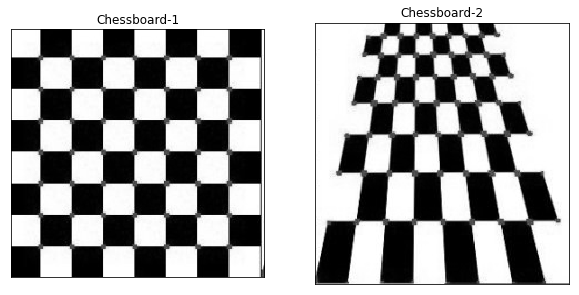

In [60]:
# Read chessboard images and diplay them
dir_ = '/home/cognitifai/Pictures/opencv/'
file1_ = 'chessboard_1.png'
file2_ = 'chessboard_2.png'

img1 = cv2.imread(os.path.join(dir_,file1_))
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(os.path.join(dir_,file2_))
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img1_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-1')
plt.subplot(122) , plt.imshow(img2_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-2')
plt.show()

In [61]:
# use HCD method for corner detection
img1_gray = np.float32(img1_gray)  # cv2.cornerHarris() takes input image as floating-point grayscale
img2_gray = np.float32(img2_gray)  # cv2.cornerHarris() takes input image as floating-point grayscale

img1_hcd = cv2.cornerHarris(img1_gray, 2, 3, 0.04)
img2_hcd = cv2.cornerHarris(img2_gray, 2, 3, 0.04)

# Dilate corner points to fill gaps 
STR_ELEMENT = None
img1_hcd_morph = cv2.dilate(img1_hcd, STR_ELEMENT)
img2_hcd_morph = cv2.dilate(img2_hcd, STR_ELEMENT)

# Mark corner points in the original image by Thresholding HCD response map
img1[img1_hcd_morph > 0.01*img1_hcd_morph.max()] = [255,0,0]
img2[img2_hcd_morph > 0.01*img2_hcd_morph.max()] = [255,0,0]

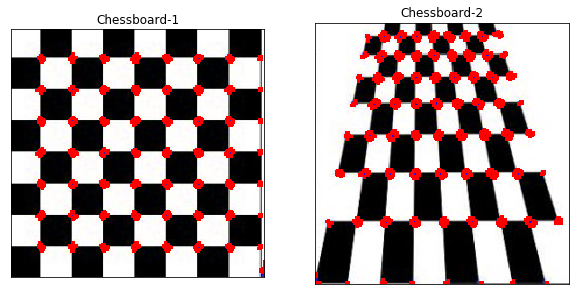

In [62]:
# Finally display the images with corner points marked on them
plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img1,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-1')
plt.subplot(122) , plt.imshow(img2,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-2')
plt.show()

### Subpixels and Corners accuracy refinement upto subpixel level
#### Ref
- [Corner subpixel-accuracy](http://aishack.in/tutorials/subpixel-corners-increasing-accuracy/)
- [Subpixel corners in OpenCV](http://www.aishack.in/tutorials/subpixel-corners-opencv/)
- [OpenCV reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

#### Notes
- In digital images, limit of spatial resolution is pixel, we cannot access information b/w pixels.
- Objects in the image are spatially quantized at pixel resolution, however the true location of object parts like edges, corners may be b/w the pixels, i.e. at non-integer/fractional coordinates (subpixel resolution)
- Thus any localization of object data would be upto pixel resolution of display, but some applications require higher accuracy of localization like in *3D-reconstruction from 2D images, Tracking, camera-caliberation, stereo-vision*
- *Mathematical techniques have been developed to inceease the accuracy of detected/localized object points*
- The subpixel cannot be accessed, but information on exact position is useful in high-level application based on corner-detection, matching etc.
- In OpenCV, there are methods (iterative ones like `cv2.cornerSubPix()` to refine position until stopping criteria - MaxIteration/epsilon change - is reached) to refine the position of corner detected by other functions like HCD, STCD (Shi-Tomasi Corner Detection)


- OpenCV method `cv2.cornerSubPix()` further refines the detected corners (by detection algos) upto sub-pixel accuracy.
- Corners do not lie on a single pixel but constitute bunch of pixels. We pass the centroids of all the corner regions to refinement method.
- Stopping criteria and window size, for searching in neighbourhood, is also to be provided.

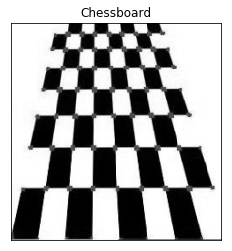

In [99]:
# Read chessboard images and diplay them
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_2.png'

img = cv2.imread(os.path.join(dir_,file_))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.show()

In [100]:
# Find harris corners in the image
img_gray = np.float32(img_gray)

img_gray_hcd = cv2.cornerHarris(img_gray, 2, 3, 0.04)
img_gray_hcd = cv2.dilate(img_gray_hcd,None)

_,img_gray_hcd = cv2.threshold(img_gray_hcd, 0.01*img_gray_hcd.max(), 255, cv2.THRESH_BINARY)
img_gray_hcd = np.uint8(img_gray_hcd) # Input image for connectedComponentsWithStats should be 8-bit

In [101]:
# find centroids of corner regions
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_gray_hcd)

In [102]:
# perform corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)  # define stopping criteria
cornersSubPix = cv2.cornerSubPix(img_gray, np.float32(centroids), (5,5), (-1,-1), criteria)

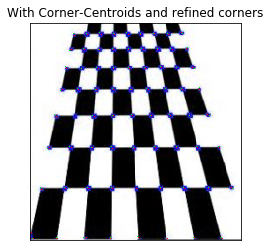

In [103]:
# Draw the centroids and refined corer points on the original image in different colors
centroids_int = np.int0(centroids)
cornersSubPix_int = np.int0(cornersSubPix)

img[centroids_int[:,1],centroids_int[:,0]] = [255,0,0]   # centroids in RED
img[cornersSubPix_int[:,1],cornersSubPix_int[:,0]] = [0,255,0]   # Refined corners in GREEN

plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('With Corner-Centroids and refined corners')
plt.show()

### Shi-Tomasi Corner detection a.k.a. Good Features to track
#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html)

#### Notes
- Shi and Tomasi presented improvement over HCD in their paper *Good Features to Track*
- In STCD, the scoring function is changed as ![Scoring function for Shi-Tomasi Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/1d9c5f834abe53109bc6cfea3557294bb38ba935.png "Scoring function for Shi-Tomasi Corner detection") (In HCD, its ![Scoring function for Harris Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/0a3ea39f0c903da7c210e2912e3c51805597f23a.png "Scoring function for Harris Corner detection")). When `R` is greater than some threshold value, its considered as a corner.
- OpenCV provides `cv2.goodFeaturesToTrack()` which finds `N` strongest corners in a grayscale image, in decreasing order of quality, using Shi-Tomasi (default) or harris CD method. We pass number of corners to be detected, Quality-level of corners (b/w 0-1), minimum euclidean distance b/w corners (Minimum possible Euclidean distance between the returned corners ; function rejects any corner for which a stornger exist at a distance less than min-distance).
- `cv2.goodFeaturesToTrack()` is useful for tracking purpose b/w frames.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

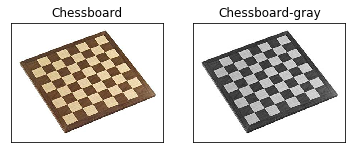

In [2]:
# Read chessboard image and diplay it
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_3.jpg'

img = cv2.imread(os.path.join(dir_,file_))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.subplot(122) , plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-gray')
plt.show()

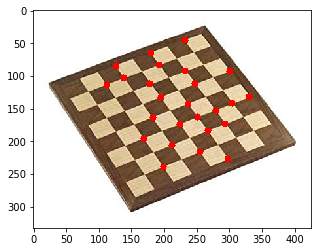

In [25]:
# Find corners and plot on original image
corners = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 5)
corners = np.int32(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),5,255,-1)

plt.imshow(img, "gray") ; plt.show()

### SIFT (Scale Invariant Feature Transform)
#### Ref
- [OpenCV reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)
- [Pyramid and scale-space](http://www.cse.psu.edu/~rtc12/CSE486/lecture10.pdf)
- [DoG images at different octaves](https://www.researchgate.net/figure/Gaussian-pyramid-and-difference-of-Gaussian-DoG-pyramid-There-are-three-octaves-each_fig1_241639414)
- [DoG vs LoG](https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and) : [DoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node9.html) and [LoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node8.html)

#### Notes
- We saw detection of corners using HCD and STCD algorithms for usage as features. 
- As corners display similar uniqueness for detecion during rotation, translation, illumination change, they constitute good features for tracking and other vision system/applications.
- But **harris corners are not scale-invariant** as the corners may not remain corners if image is scaled and may become flat- or edge-region.
- SIFT algorithm is broadly a 4-step process to *extract scale-invariant keypoints and compute their desciptors*.
- 4 steps of SIFT
    1. *Scale-space extrema detection* 
        - We can't use same window to detect keypoints with different scale. It may detect small-scale corners but may not perform for large-scale ones, which need larger windows. 
        - Scale-space filtering is used for detecting keypoints with different scales. 
        - laplacian of gaussian filters with different $\sigma$ are applied on the image. idea is to detect blobs in various sizes by appling LoG kernel having $\sigma$ of that scale.
        - E.g. gaussian kernel with low $\sigma$ gives high response value over small corner, while that with higher $\sigma$ gives high response over large corner of that scale.
        - So we generate *response map of local-maxima* across space and scale $(x,y,\sigma)$ which gives potential keypoint at $(x,y)$ in the image of scale $\sigma$.
        - As LoG operation is costly, it is *approximated with difference of Gaussian blurring* of an image with 2 different $\sigma - \sigma\ and\ k\sigma$. This process is done for different **octaves/levels (power of 2 change in resolution)** of image in its Gaussian Pyramid. **DoG is tunable band-pass filter.**
        - *The DoG also appears naturally in the scale-space setting, where the image is filtered at many scales (Gaussians with different sigmas), the difference between subsequent scales is a DoG.*
        - From DoG, *local extrema* is searched over scale and space. 1 pixel is compared with *8 neighbours in that scale and 9 pixels in previous and next scales*. That local extrema is a *potential keypoint* which is best represented in that scale.
        - Some emperical values of parameters in SIFT algorithm -> # of octaves : 4 ; # of scale levels : 5 ; $\sigma : 1.6 ; k = \sqrt2$ 
        
    2. *Keypoint Localization*
        - Refinement of potential keypoint locations.
        - Taylor series expansion of scale-space is done to get more accurate location of extremas.
        - If intensity at extrema is less than threshold value called *contrastThreshold* (0.03 in paper), itis rejected.
        - As DoG preserves edges, they need to be removed/filtered-out. 2x2 Hessian matrix is computed to determine principal curvature. As for edges, 1 eigenvalue is greater than the other, we find their ratio which if > *edgeThreshold (10 in the paper)* leads to discarding that keypoint.
        - This *removes low-cotrast keypoints and edge keypoints*.
    
    3. *Orientation Assignment*
        - Orientation is assigned to each keypoint for invariance during image rotation. Based on scale, a neighbourhood is taken around the keypoint, in which gradient magnitude and direction is calculated. 
        - Then *orientation histogram* is created with 36 bins covering $360^o$ of orientation. The histogram is weighted by gradient-magnitude and gaussian-weighted circular window with $\sigma > 1.5\times$ scale of keypoint.
        - Highest peak and peak $>80\%$ of it are taken for orientation calculation, which creates keypoints of same scale and location but different directions, leading to stability of matching.
        
    4. *keypoint Descriptor*
        - Now that we have keypoints with good 

In [6]:
img_g1 = cv2.GaussianBlur(img_gray,(5,5),1.1,0)
img_g2 = cv2.GaussianBlur(img_gray,(5,5),1.1*1.414,0)

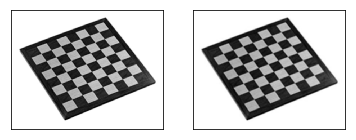

In [7]:
plt.subplot(121) , plt.imshow(img_g1,"gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(img_g2,"gray"), plt.xticks([]), plt.yticks([])
plt.show()

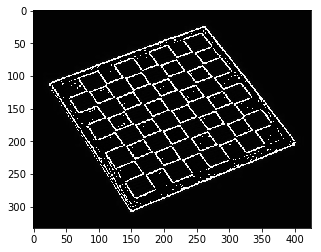

In [10]:
img_dog = img_g1-img_g2
plt.imshow(np.abs(img_dog),"gray")

In [13]:
np.unique(img_dog)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  20, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)